# Live Code 3

### Problems
Menggunakan dataset https://www.kaggle.com/amansaxena/lifeexpectancy, buatlah model machine learning unsupervised menggunakan KMeans untuk mendeteksi kelompok negara dan jawab beberapa pertanyaan di bawah sebagai acuan analisa/cerita:

- Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan?
- Berapa cluster yang berhasil kamu peroleh dari dataset tersebut? apakah sudah optimal? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
- Bagaimana karakteristik dari masing-masing cluster? Bisakah kamu visualisasikan dan ceritakan?
- Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3?
- Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh? coba ceritakan analisamu!


### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("Life_expectancy_dataset.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [4]:
# Showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [5]:
# Get descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,223.0,112.000000,64.518731,1.0,56.50,112.0,167.50,223.0
Overall Life,223.0,72.487892,8.459335,50.2,67.45,74.9,78.60,89.5
Male Life,223.0,70.041704,8.074942,48.6,64.50,72.2,75.85,85.6
Female Life,223.0,75.019283,8.986633,51.0,69.75,77.9,81.60,93.5


In [6]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (223, 6)


### Data Cleaning
Pertama, kita akan melakukan pengecekan terhadap missing value dan duplikat.

In [7]:
# Missing Value
print('Missing value :','\n', df.isnull().sum())
print("-----------------------------------------")
# Duplicated Data
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64
-----------------------------------------
Duplicated data :  0


Didapatkan hasil yaitu tidak adanya missing value ataupun duplikat. Selanjutnya kita akan menghapus kolom yang tidak akan terpakai.

In [8]:
data = df.drop(columns=['Country','Rank'])
data.head()

,Overall Life,Male Life,Female Life,Continent
0,89.5,85.6,93.5,Europe
1,85.0,81.7,88.5,Asia
2,85.0,82.3,87.8,Asia
3,84.5,81.6,87.6,Asia
4,83.3,80.7,86.1,Europe


### Exploratory Data Analysis (EDA)
Sekarang, kami akan menganalisa numerikal dan kategorical fitur pada dataset.

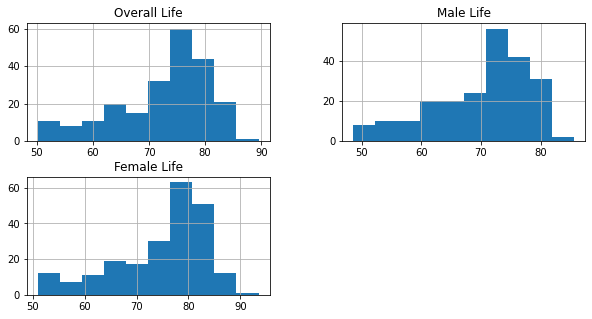

In [9]:
# Histogram
data.hist(figsize=(10, 5))
plt.show()

In [10]:
# Showing Skewness
df.skew()

Rank            0.000000
Overall Life   -0.896328
Male Life      -0.789435
Female Life    -0.964768
dtype: float64

Dari histogram diatas didapatkan hasil bahwa 3 kolom diatas memiliki arah negatively skew.

In [11]:
data.groupby('Continent').mean()

,Overall Life,Male Life,Female Life
Continent,,,
Africa,61.800000,60.109091,63.583636
Asia,73.618367,71.046939,76.138776
Europe,79.019608,76.003922,82.237255
North America,76.273529,73.914706,78.738235
Oceania,74.230000,71.625000,76.915000
South America,75.042857,72.157143,77.992857


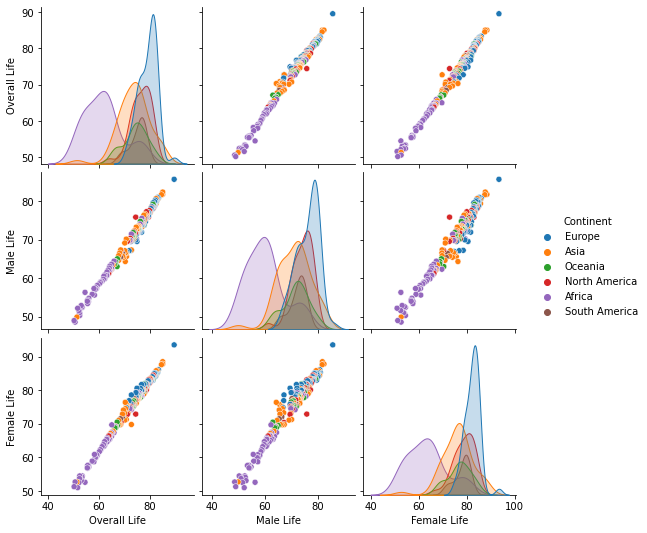

In [12]:
sns.pairplot(data = data, hue='Continent')

<AxesSubplot:xlabel='Female Life', ylabel='Male Life'>

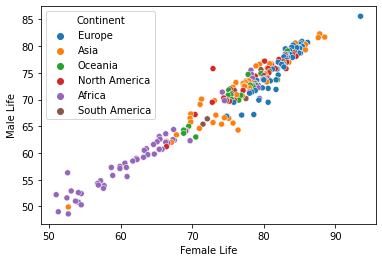

In [13]:
sns.scatterplot(data = data, x='Female Life', y ='Male Life', hue = 'Continent')

Dari plot diatas kita bisa simpulkan bahwa terbagi menjadi 3 bagian yaitu:
- **Low Life Expectancy** dikuasai oleh benua Afrika
- **Medium Life Expectancy** dikuasai oleh benua Asia
- **High Life Expectancy** dikuasai oleh benua Eropa

Secara garis besar, negara dan benua dapat dikelompokan menjadi *Life Expectancy* yang **rendah**, **menengah** dan **tinggi**

### Data Pre-processing
Selanjutnya, kita akan melakukan dimensi reduksi untuk meningkatkan akurasi model.

In [14]:
num = data.drop(columns=["Continent"])

In [15]:
from sklearn.preprocessing import StandardScaler

#Define Scaler
scaler = StandardScaler()

#Fit and transform numerical data
num_sc = scaler.fit_transform(num)

In [16]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=3)
pca.fit(num_sc)

PCA(n_components=3)

In [17]:
# Mengetahui EVR
pca.explained_variance_ratio_

array([9.91968378e-01, 7.76868310e-03, 2.62939033e-04])

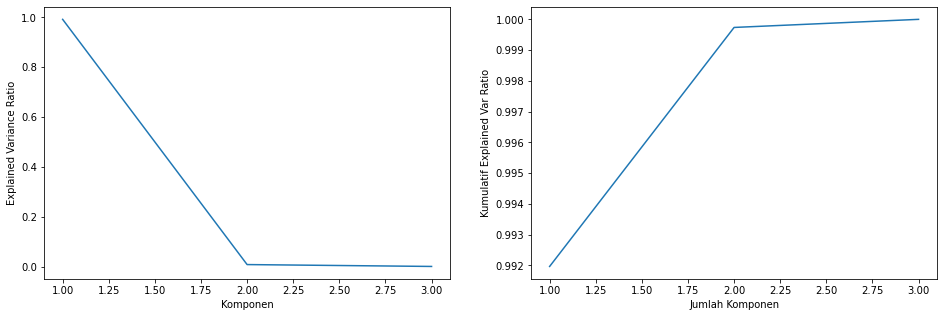

In [18]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,4),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,4),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Nampak jelas bahwa adanya patahan di 2 komponen dengan cumsum EVR diatas 95.

In [19]:
# Create model PCA 2 Dimensions
pca_fin = PCA(n_components=2)
X_train = pca_fin.fit_transform(num_sc)

In [20]:
np.sum(pca_fin.explained_variance_ratio_)

0.9997370609668289

Maka sekarang hanya mempunyai 2 dimensi.

### Model Definition
Dalam analisis ini, kami menggunakan **K-Means** sebagai model untuk melatih dataset.

#### Elbow Method

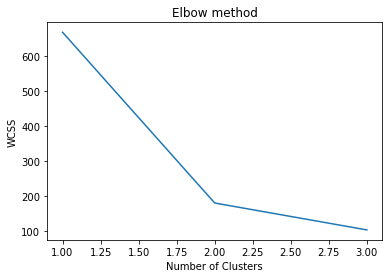

In [21]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=1).fit(X_train) for k in range (1, 4)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 4), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Nampak jelas bahwa adanya patahan diatas pada angka 2. Kami akan menggunakan skor siluet untuk melihat mana komponen yang berkinerja lebih baik.

#### Silhouette Scores

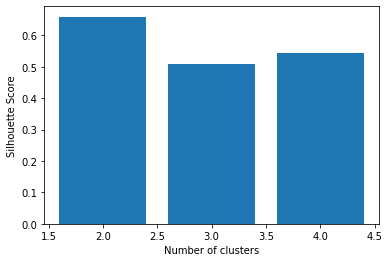

In [22]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 5):
    silhouette_scores.append( 
        silhouette_score(X_train, KMeans(n_clusters = n_cluster).fit_predict(X_train))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Skore siluet juga mendapatkan dengan 2 cluster. Maka diasumsikan bahwa 2 komponen menjadi komponen terbaik. 

In [23]:
#Define the final Model
fin_km = KMeans(n_clusters=2, random_state=42)

#Train the dataset
fin_km.fit(X_train)

KMeans(n_clusters=2, random_state=42)

### Model Evaluation
Kami akan mereduksi dataset menjadi dimensi 2D meskipun tidak akan mewakili semua data, tetapi hanya untuk tujuan visualisasi.

In [24]:
# PCA 2 Dimensions
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(num_sc)

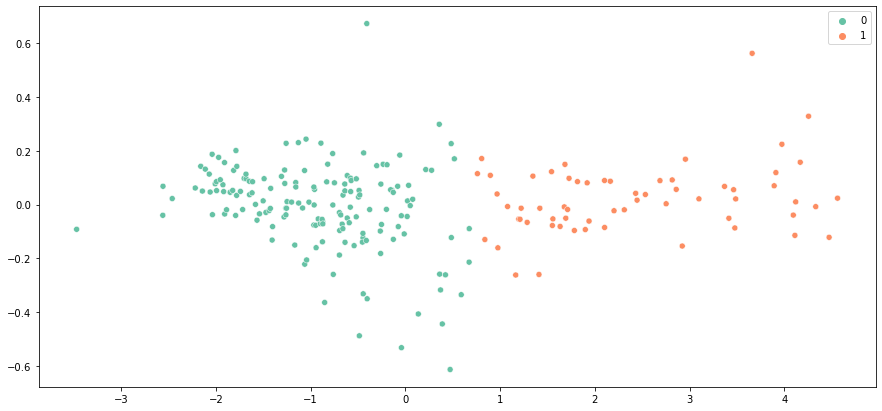

In [25]:
#Predict dataset
a = fin_km.predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train_2d[:,0], y =X_train_2d[:,1], hue=a, palette="Set2")
plt.show()

Dengan menggunakan K-Means terlihat sangat jelas bahwa adanya 2 kelompok.

### Understanding 2 Cluster

In [26]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [27]:
km_2  = KMeans(n_clusters=2, random_state=40).fit(X_train)
df['cluster'] = km_2.labels_

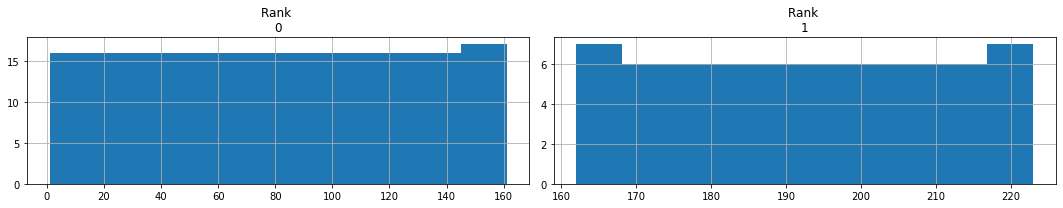

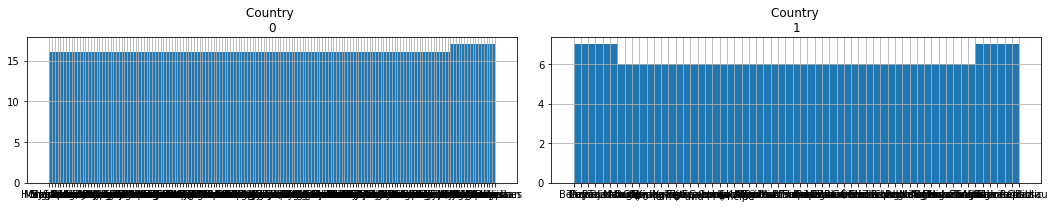

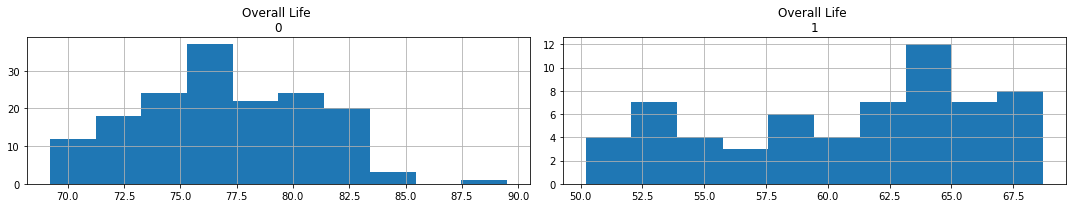

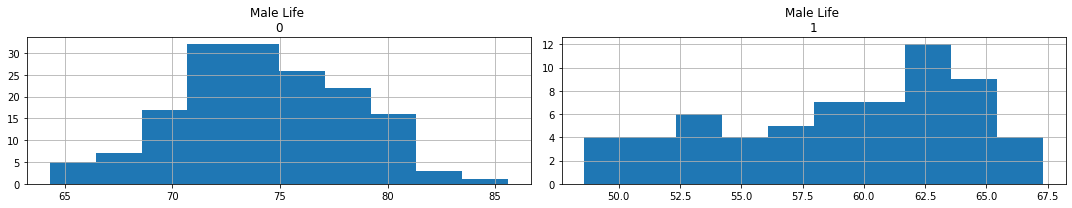

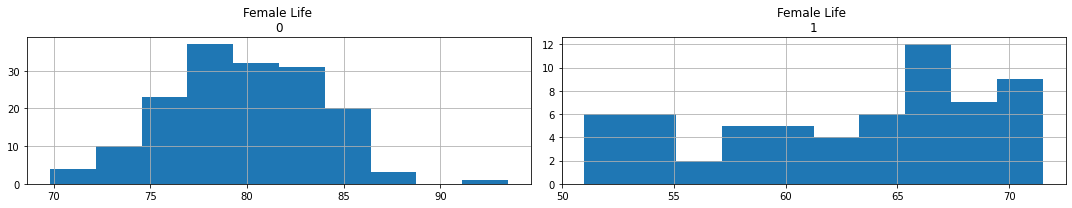

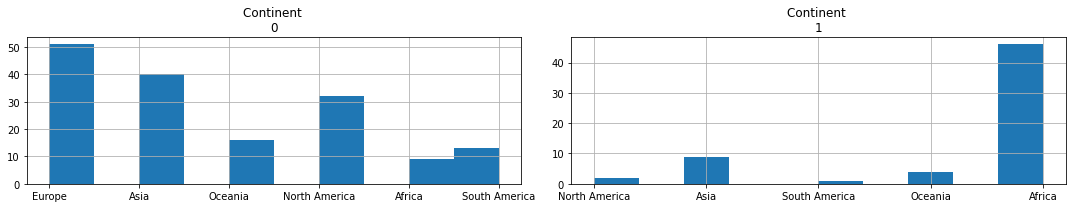

In [30]:
col_list= ['Rank','Country','Overall Life','Male Life','Female Life','Continent']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,2):
        plt.subplot(1,2,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

Setelah melakukan model K-Means kita dapat melihat jelas bahwa adanya 2 kelompok yang terbentuk. Maka, berikut ciri" *Life Expectancy* :
1. **Low Life Expectancy (0)** = Kelompok ini berasal dari benua Afrika
2. **High Life Expectancy (1)** = Kelompok ini berasal dari benua Eropa, Asia dan North Amerika

### Model Inference
Pada tahap ini, kami akan membuat data baru untuk melakukan prediksi.

In [36]:
num.head()

,Overall Life,Male Life,Female Life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1


In [37]:
# New Data
new = [[84.9, 82.1, 88.8]]

#Data PreProcessing
new = scaler.transform(new)
new_data = pca_fin.transform(new) 


#Predict data
y = fin_km.predict(new_data)

print("Hasil K-Means : \n")
print('Target {}'.format(y))

Hasil K-Means : 

Target [0]


### Kesimpulan

In [38]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster
0,1,Monaco,89.5,85.6,93.5,Europe,0
1,2,Japan,85.0,81.7,88.5,Asia,0
2,3,Singapore,85.0,82.3,87.8,Asia,0
3,4,Macau; China,84.5,81.6,87.6,Asia,0
4,5,San Marino,83.3,80.7,86.1,Europe,0


<AxesSubplot:xlabel='count', ylabel='Continent'>

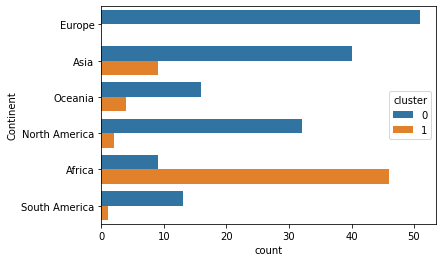

In [39]:
sns.countplot(data = df, y = 'Continent', hue='cluster')

Walaupun pada EDA kami mengasumsikan dengan mendapatkan 3 kelompok tetapi setelah dilakukan model K-Means kami mendapatkan hasil yang terbaik yaitu pada 2 kelompok. Kelompok pertama yang dapat disebut dengan **Low Expectancy** yang dimana didominasikan dengan benua Afrika sedangkan dengan kelompok kedua disebut dengan **High Expectancy** didominasikan dengan benua Eropa.